# Visualização de Dados em Python
# Teste de OpenCV e Otsu



Neste notebook, a ideia é testar se o OpenCV foi instalado e funciona corretamente em seu computador. 

A aplicação é conseguir extrair as formas das folhas. 

Se for necessário acrescentar passos adicionais além daqueles que estão indicados neste notebook, faça isso.

Não esqueça de carregar as bibliotecas.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Carregue a imagem usando função do OpenCV

Para carregar a imagem usando o OpenCV, use a função "cv2.imread". 

Para mostrar a imagem, o OpenCV tem função imshow, mas que não funciona bem no ambiente Jupyter Notebook. 


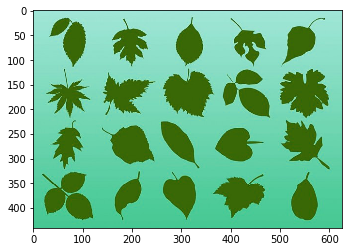

In [3]:
folhas = cv2.imread('teste.jpg')
plt.imshow(folhas)
plt.show()

# Converta a imagem para escala de cinza




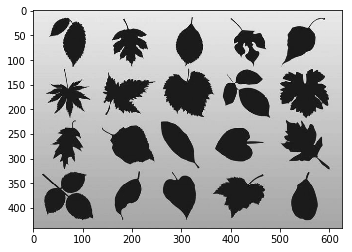

In [4]:
# convert to grayscale
folhas_cinza = cv2.cvtColor(folhas, cv2.COLOR_BGR2GRAY)
plt.imshow(folhas_cinza, cmap='gray')
plt.show()


# Compare a imagem colorida e a em escala de cinza

Veja como a imagem colorida possui uma dimensão a mais. 


In [9]:
folhas.shape

(441, 626, 3)

In [10]:
folhas_cinza.shape

(441, 626)

# Aplicando Otsu para transformação em B&W

Para transformar a imagem em duas cores, temos que encontrar o limiar. No OpenCV já existe função "cv2.threshold" para encontrar o limiar. 


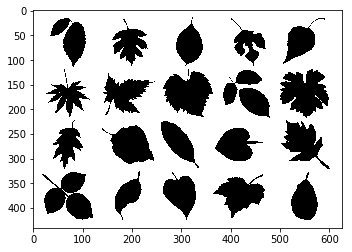

In [23]:
_, thresh1 = cv2.threshold(folhas_cinza, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh1, cmap='gray')
plt.show()

# Vamos inverter o B&W

Faça o código (com uma linha apenas) que inverta as cores da imagem, onde está na cor preta fica na cor branca e vice-versa. 

Depois mostre a imagem para conferir a inversão.

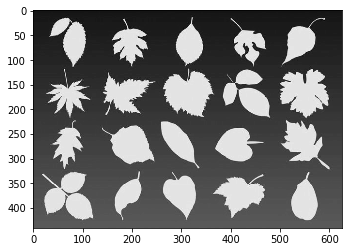

In [42]:
# inverter cores
folhas_bw = cv2.bitwise_not(folhas_cinza)

# mostrar imagem
plt.imshow(folhas_bw, cmap='gray')
plt.show()

Também seria possível ter usado o parâmetro THRESH_BINARY_INV, e não seria necessário dois passos. 

_, thresh1 = cv2.threshold(folhas_cinza, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

==> Mas não é essa a resposta do código acima. 

# Vamo pegar o contorno das folhas





Veja o resultado de resposta. 


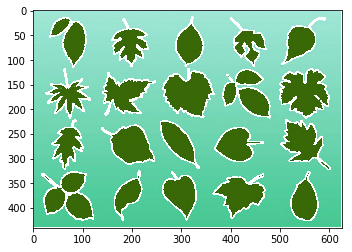

In [60]:
folhas_copia = folhas.copy() # copia imagem para outra variável

# retorna imagem (modificada), contornos e vetores
image, contours, hierarchy = cv2.findContours(thresh1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# desenha cada contorno na imagem
branco = (255,255,255)
for cnt in contours:
    cv2.drawContours(folhas_copia, # imagem
                     [cnt],        # contorno
                     0,            # index do contorno
                     branco,       # cor do contorno
                     2)            # tamanho do contorno

# mostrar imagem
plt.imshow(folhas_copia)
plt.show()

Entendeu o que a função findContours faz? E drawContours? Explique. 

**R:** A função findContours retorna os contornos detectados na imagem de input, enquanto a função drawContours desenha essas imagens na imagem de input, como acima mostrado.